In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_excel('Data_Train.xlsx')


In [3]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [4]:
test = pd.read_excel('Data_Test.xlsx')
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [6]:
train.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [7]:
train.Location.value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

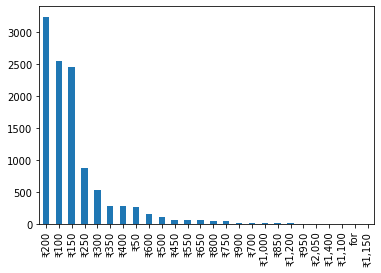

In [8]:
train.Average_Cost.value_counts().plot(kind='bar')


In [9]:
train.groupby("Average_Cost")["Delivery_Time"].describe()

,count,unique,top,freq
Average_Cost,,,,
for,1,1,30 minutes,1
"₹1,000",12,3,30 minutes,7
"₹1,100",1,1,45 minutes,1
"₹1,150",1,1,30 minutes,1
"₹1,200",8,3,65 minutes,4
"₹1,400",1,1,45 minutes,1
₹100,2557,7,30 minutes,2024
₹150,2462,7,30 minutes,1793
"₹2,050",1,1,30 minutes,1


### Univariate Analysis


In [10]:
#combine data sets
combined=pd.concat([train,test],sort=False,ignore_index=True)

In [11]:
combined.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
13863,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",₹100,₹50,NEW,-,-,NaN
13864,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",₹250,₹50,3.1,5,1,NaN
13865,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",₹150,₹50,3.0,16,1,NaN
13866,ID_2475,"D-Block, Sector 63, Noida",Bakery,₹100,₹99,3.0,7,2,NaN
13867,ID_1595,"Dockyard Road, Mumbai CST Area","Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,NaN


In [12]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null object
Reviews          13868 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 975.2+ KB


In [13]:
#delivary time
combined.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

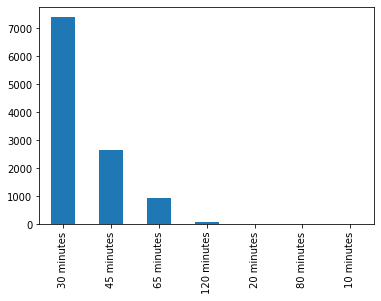

In [14]:
combined.Delivery_Time.value_counts().plot(kind='bar')

In [15]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [16]:
combined.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [17]:
combined.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [18]:
combined.Minimum_Order.unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [19]:
int(combined.Minimum_Order[0].split('₹')[1])

50

In [20]:
mlist=[]
for i in combined.Minimum_Order:
    mlist.append(int(i.split('₹')[1]))

In [21]:
combined['Min_Order_clean']=pd.Series(mlist)

In [22]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99


In [23]:
combined.loc[combined.Average_Cost=='for','Average_Cost']='0'

In [24]:
mlist1=[]
for i in combined.Average_Cost:
    mlist1.append(int(i.replace('₹','').replace(',','')))

In [25]:
combined['AvgCost_Clean']=pd.Series(mlist1)

In [26]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200


In [27]:
combined.Location.unique()

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

In [28]:
combined.Location.value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          1158
D-Block, Sector 63, Noida                           1027
Sector 1, Noida                                      990
FTI College, Law College Road, Pune                  734
Delhi University-GTB Nagar                           699
Sector 14, Noida                                     630
Laxman Vihar Industrial Area, Sector 3A, Gurgoan     611
Delhi Administration Flats, Timarpur                 602
Rmz Centennial, I Gate, Whitefield                   585
Mumbai Central                                       578
MG Road, Pune                                        509
Delhi High Court, India Gate                         504
Nathan Road, Mangaldas Road, Pune                    476
Sandhurst Road, Mumbai CST Area                      463
Sector 3, Marathalli                                 444
Majestic                                             411
Delhi Cantt.                                         397
Yerawada, Pune, Maharashtra    

In [29]:
city=[]
for i in combined.Location:
    city.append(i.split(', ')[-1])

In [30]:
combined['Location_Clean']=pd.Series(city)

In [31]:
combined.Location_Clean.unique()

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [32]:
combined.Location_Clean.replace(to_replace=['Marathalli','Whitefield','Majestic','BTM Layout,Bangalore','Electronic City'],value=['Bangalore']*5,inplace=True)

In [33]:
combined.Location_Clean.replace(to_replace=['Maharashtra','Pune University'],value=['Pune']*2,inplace=True)

In [34]:
combined.Location_Clean.replace(to_replace=['Delhi University-GTB Nagar','Timarpur','India Gate','Delhi Cantt.'],value=['Delhi']*4,inplace=True)

In [35]:
combined.loc[combined.Location_Clean=='Gurgoan','Location_Clean']='Gurgaon'

In [36]:
combined.Location_Clean.replace('Sector 63A,Gurgaon','Gurgaon',inplace=True)

In [37]:
combined.Location_Clean.unique()

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida', 'Delhi', 'Kolkata',
       'Mumbai CST Area', 'Gurgaon', 'Begumpet', 'Hyderabad', 'Mumbai'],
      dtype=object)

In [38]:
combined.Location_Clean.replace('Begumpet','Hyderabad',inplace=True)

In [39]:
combined.Location_Clean.replace(to_replace=['Mumbai Central','Mumbai CST Area'],value=['Mumbai']*2,inplace=True)

In [40]:
combined.Location_Clean.unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

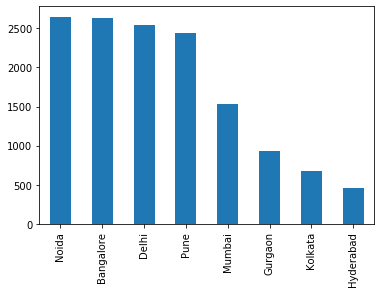

In [41]:
combined.Location_Clean.value_counts().plot(kind='bar')

In [42]:
len(combined.Cuisines.unique())

2392

In [43]:
combined.Cuisines.value_counts()


North Indian                                                               1076
North Indian, Chinese                                                       786
Fast Food                                                                   553
South Indian                                                                336
Chinese                                                                     303
Bakery                                                                      219
Street Food                                                                 211
Bakery, Desserts                                                            200
North Indian, Mughlai                                                       192
Pizza, Fast Food                                                            171
Chinese, North Indian                                                       152
Fast Food, Beverages                                                        138
North Indian, Fast Food                 

In [44]:
combined.Cuisines[0].split(", ")

['Fast Food', 'Rolls', 'Burger', 'Salad', 'Wraps']

In [45]:
food1=[]
for i in combined.Cuisines:
    food1.append(i.split(", "))

In [46]:
df1=pd.DataFrame(food1)
df1.head()

,0,1,2,3,4,5,6,7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [47]:
df1[1].unique()

array(['Rolls', 'Desserts', 'Street Food', 'North Indian', 'Beverages',
       'Fast Food', 'Thai', 'Chinese', None, 'Mughlai', 'Bihari',
       'Ice Cream', 'South Indian', 'Mexican', 'Burmese', 'Italian',
       'Mangalorean', 'European', 'Continental', 'Bengali', 'Pizza',
       'Hyderabadi', 'Biryani', 'Lucknowi', 'Cafe', 'Burger', 'Bakery',
       'Sushi', 'American', 'Juices', 'Cantonese', 'Momos',
       'Healthy Food', 'Sandwich', 'Lebanese', 'Spanish', 'Tea',
       'Maharashtrian', 'North Eastern', 'Kebab', 'Paan', 'Afghan',
       'Asian', 'Mithai', 'Salad', 'Gujarati', 'Seafood', 'Finger Food',
       'Brazilian', 'Arabian', 'Chettinad', 'Belgian', 'Naga', 'Awadhi',
       'Mediterranean', 'Wraps', 'Tibetan', 'Charcoal Chicken',
       'Rajasthani', 'BBQ', 'Coffee', 'Andhra', 'Mishti', 'Bar Food',
       'Bubble Tea', 'Nepalese', 'Japanese', 'Vietnamese', 'Indian',
       'Malaysian', 'Malwani', 'Steak', 'Korean', 'Roast Chicken',
       'Tex-Mex', 'Iranian', 'Odia', 'Frenc

In [48]:
fastfood=['Fast Food','Cafe','Chinese','Burger','Street Food', 'Pizza','Tea', 'Rolls','Momos','Finger Food', 'Sandwich','Bar Food','Wraps','Hot dogs']
desserts=['Ice Cream','Mithai','Desserts', 'Bakery','Mishti','Paan','Frozen Yogurt']
main=['Italian', 'Mughlai','South Indian','North Indian','Biryani', 'Kerala','Asian','Lucknowi','Bengali','European','Continental', 'Andhra', 'German','Chettinad','Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian','Tibetan', 'Arabian','Konkan', 'Odia','Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food''Raw Meats', 'Gujarati','Seafood', 'Rajasthani', 'BBQ','Mexican', 'Goan','Afghan', 'Awadhi', 'Malwani', 'Malaysian','Hyderabadi', 'French', 'Modern Indian', 'Sushi','Iranian', 'Brazilian', 'Indian', 'African','Turkish', 'Assamese', 'Naga', 'Middle Eastern', 'Vietnamese',
       'Steak','Charcoal Chicken','Nepalese','Cantonese','Belgian','Tex-Mex','Malwani','Burmese','Spanish','Roast Chicken','Indonesian', 'Bangladeshi', 'South American', 'Poké', 'Greek', 'Israeli', 'Sri Lankan']
beverage=['Beverages','Juices','Tea','Coffee','Bubble Tea']

In [49]:
def food_cat(x):
    if(x in fastfood):
        return("Fast Food")
    elif(x in desserts):
        return("Deserts")
    elif(x in beverage):
        return('Beverages')
    else:
        return("Mains")


In [50]:
combined['Cuisines_Clean']=pd.Series(df1[0].apply(food_cat))

In [51]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200,Pune,Fast Food
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100,Bangalore,Deserts
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150,Mumbai,Mains
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250,Noida,Mains
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200,Bangalore,Fast Food


In [52]:
combined.loc[combined.Average_Cost=='0']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean
6297,ID_6472,Pune University,Fast Food,0,₹50,NEW,-,-,30 minutes,50,0,Pune,Fast Food


In [53]:
combined[(combined.Location_Clean=='Pune') & (combined.Cuisines_Clean=='Fast Food')]['AvgCost_Clean'].describe()

count    1016.000000
mean      198.375984
std       127.440976
min         0.000000
25%       100.000000
50%       150.000000
75%       200.000000
max      1000.000000
Name: AvgCost_Clean, dtype: float64

In [54]:
combined.loc[combined.AvgCost_Clean=='0','AvgCost_Clean']=150

In [55]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 13 columns):
Restaurant         13868 non-null object
Location           13868 non-null object
Cuisines           13868 non-null object
Average_Cost       13868 non-null object
Minimum_Order      13868 non-null object
Rating             13868 non-null object
Votes              13868 non-null object
Reviews            13868 non-null object
Delivery_Time      11094 non-null object
Min_Order_clean    13868 non-null int64
AvgCost_Clean      13868 non-null int64
Location_Clean     13868 non-null object
Cuisines_Clean     13868 non-null object
dtypes: int64(2), object(11)
memory usage: 1.4+ MB


In [56]:
combined.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [57]:
combined.Rating=pd.to_numeric(combined.Rating,errors='coerce')

In [58]:
combined.Rating.describe()

count    11398.000000
mean         3.610791
std          0.413490
min          2.100000
25%          3.300000
50%          3.600000
75%          3.900000
max          4.900000
Name: Rating, dtype: float64

In [59]:
combined.Rating.fillna(value=3.6,inplace=True)

In [60]:
combined.isnull().sum()

Restaurant            0
Location              0
Cuisines              0
Average_Cost          0
Minimum_Order         0
Rating                0
Votes                 0
Reviews               0
Delivery_Time      2774
Min_Order_clean       0
AvgCost_Clean         0
Location_Clean        0
Cuisines_Clean        0
dtype: int64

In [61]:
combined.Reviews=pd.to_numeric(combined.Reviews,errors='coerce')

In [62]:
combined.Reviews.describe()

count    10963.000000
mean       120.893004
std        315.592114
min          1.000000
25%          7.000000
50%         26.000000
75%         90.000000
max       6504.000000
Name: Reviews, dtype: float64

In [63]:
combined.Reviews.fillna(value=26,inplace=True)

In [64]:
combined.Votes=pd.to_numeric(combined.Votes,errors='coerce')

In [65]:
combined.Votes.describe()

count    11252.000000
mean       241.050036
std        549.570301
min          3.000000
25%         19.000000
50%         63.000000
75%        214.000000
max       9054.000000
Name: Votes, dtype: float64

In [66]:
combined.Votes.fillna(value=63,inplace=True)

In [67]:
def rating_cat(x):
    if(x>=4.5):
        return("Excellent")
    elif(x>=4.0):
        return("Very Good")
    elif(x>=3.5):
        return("Good")
    elif(x>=3.0):
        return("Average")
    else:
        return("Poor")

In [68]:
combined["Rating_Cat"]=pd.Series(combined.Rating.apply(rating_cat))

In [69]:
combined.head(2)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good


In [70]:
newtrain=combined.loc[:train.shape[0]-1]

In [71]:
newtrain.shape

(11094, 14)

In [72]:
newtest=combined.loc[11094:combined.shape[0]]

In [73]:
newtest.shape

(2774, 14)

In [74]:
newtrain.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Min_Order_clean',
       'AvgCost_Clean', 'Location_Clean', 'Cuisines_Clean', 'Rating_Cat'],
      dtype='object')

In [75]:
train_new=newtrain.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order'],axis=1)

In [76]:
test_new=newtest.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order','Delivery_Time'],axis=1)

In [77]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Mains,Good
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Mains,Good
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


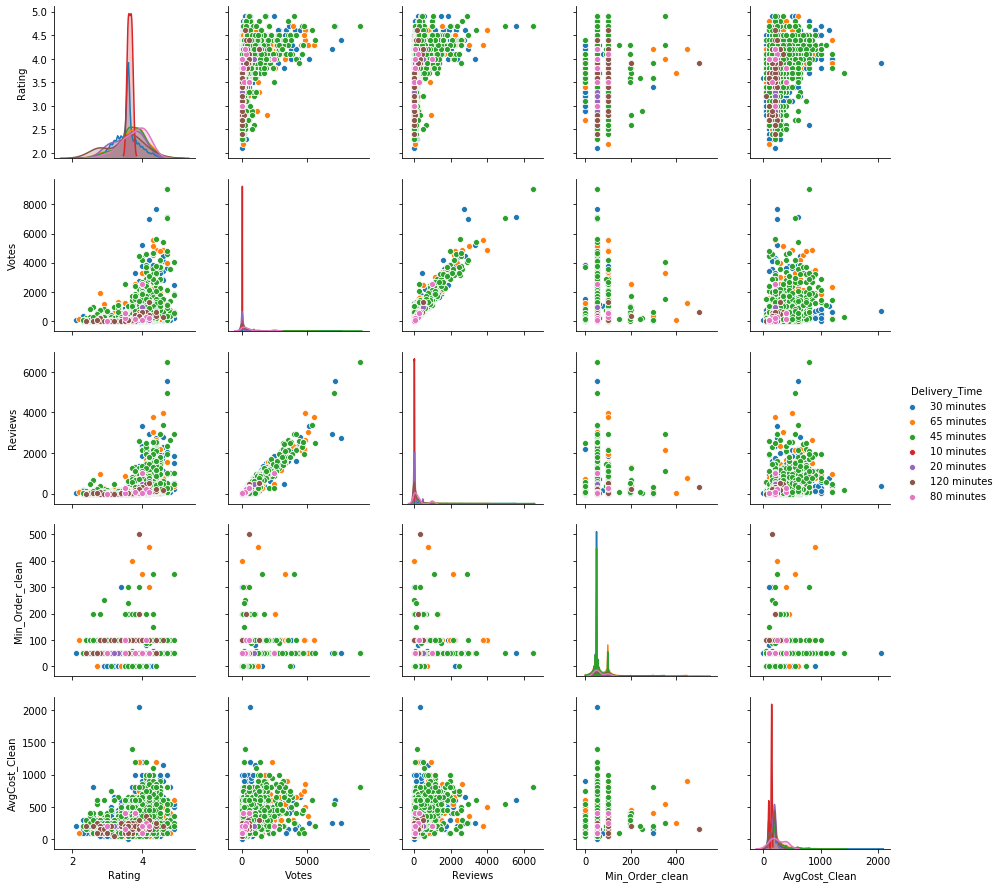

In [78]:
sns.pairplot(train_new,hue='Delivery_Time')

In [79]:
import scipy.stats as stats
import statsmodels.api as sms # ANova table 
from statsmodels.formula.api import ols # regression fit
# from scipy.stats import f_oneway

In [80]:
model=ols("Rating~Delivery_Time",data=train_new).fit()

In [81]:
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Delivery_Time,6.0,51.471247,8.578541,62.727838,7.136598e-77
Residual,11087.0,1516.237260,0.136758,NaN,NaN


In [82]:
# p-value < 0.05 means fail to reject null hypothesis

In [83]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Mains,Good
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Mains,Good
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


1. If columns are numericals in nature and no population matrix ig given then t-test is ideal test
2. If 1 column is numerical and other is categorical then the variance can be explained by ANOVA
3. If both columns are categorical in nature then use chi-square test of goodness of fit.# chi-square test isa right tailed test in nature
#### goodness of fit: how much observed data matches with expected value

In [84]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Mains,Good
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Mains,Good
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


In [85]:
train_new.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [86]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [87]:
le=LabelEncoder()

In [88]:
train_new["Delivery_Time_coded"]=le.fit_transform(train_new.Delivery_Time)

In [89]:
finaltrain=train_new.drop("Delivery_Time",axis=1)

In [90]:
finaltrain.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat,Delivery_Time_coded
0,3.5,12.0,4.0,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,50,150,Mumbai,Mains,Good,5
3,3.7,176.0,95.0,99,250,Noida,Mains,Good,3
4,3.2,521.0,235.0,99,200,Bangalore,Fast Food,Average,5


In [91]:
# train_new1=train_new.copy()

In [92]:
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("10 minutes","0")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("20 minutes","1")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("30 minutes","2")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("45 minutes","3")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("65 minutes","4")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("80 minutes","5")
# train_new1.Delivery_Time=train_new1.Delivery_Time.str.replace("120 minutes","6")

In [93]:
# train_new1.Delivery_Time=train_new1.Delivery_Time.astype(int)

In [94]:
# train_new1.head()

In [95]:
# train_new1.corr()["Delivery_Time"]

In [96]:
# train_new1.corr()

In [97]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Rating                 11094 non-null float64
Votes                  11094 non-null float64
Reviews                11094 non-null float64
Min_Order_clean        11094 non-null int64
AvgCost_Clean          11094 non-null int64
Location_Clean         11094 non-null object
Cuisines_Clean         11094 non-null object
Rating_Cat             11094 non-null object
Delivery_Time_coded    11094 non-null int32
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 736.8+ KB


In [98]:
dummytrain=pd.get_dummies(finaltrain)

In [99]:
print(finaltrain.shape)
print(dummytrain.shape)

(11094, 9)
(11094, 23)


In [100]:
dummytrain.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Delivery_Time_coded,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,Location_Clean_Hyderabad,...,Location_Clean_Pune,Cuisines_Clean_Beverages,Cuisines_Clean_Deserts,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x=dummytrain.drop("Delivery_Time_coded",axis=1)
y=dummytrain.Delivery_Time_coded

In [103]:
# x=dummytrain.drop("Rating",axis=1)

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=123)

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [106]:
scaled_train = pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_train.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,Location_Clean_Hyderabad,Location_Clean_Kolkata,...,Location_Clean_Pune,Cuisines_Clean_Beverages,Cuisines_Clean_Deserts,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good
0,-0.036508,0.014104,-0.004227,-0.178950,-0.027449,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.185749,-0.375161,1.429529,-1.029854,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,-0.300793,-0.210916,-0.210371,2.533425,0.735013,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,1.429529,-1.029854,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,-1.622216,-0.298878,-0.270793,-0.178950,-0.027449,-0.484987,-0.471826,-0.268791,-0.189291,4.378408,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,1.814273,-0.129328,-1.089513,-0.22399,-0.436436
3,1.813484,0.083656,0.066857,-0.178950,-0.027449,-0.484987,2.119423,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
4,0.756345,0.230942,0.226797,-0.178950,-0.027449,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


In [107]:
scaled_test = pd.DataFrame(sc.transform(xtest),columns=xtest.columns)
scaled_test.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,Location_Clean_Hyderabad,Location_Clean_Kolkata,...,Location_Clean_Pune,Cuisines_Clean_Beverages,Cuisines_Clean_Deserts,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good
0,0.492061,-0.319334,-0.288564,-0.178950,-0.027449,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,0.492061,-0.047265,-0.146395,-0.178950,1.116244,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,1.284914,-0.155683,-0.075311,2.533425,-0.027449,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
3,-0.036508,-0.298878,-0.270793,-0.178950,-0.789910,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
4,-0.036508,-0.298878,-0.270793,-0.178950,0.353782,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.185749,-0.375161,-0.699531,0.971012,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


In [108]:
scaled_train.Rating.describe()

count    8.875000e+03
mean     5.504204e-17
std      1.000056e+00
min     -4.000777e+00
25%     -5.650777e-01
50%     -3.650850e-02
75%      4.920607e-01
max      3.399191e+00
Name: Rating, dtype: float64

In [109]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [110]:
scaled_train.shape

(8875, 22)

In [111]:
ytrain.shape

(8875,)

In [112]:
scaled_test.shape

(2219, 22)

In [113]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pred_knn=knn.fit(scaled_train,ytrain).predict(scaled_test)
print("The Accuracy",accuracy_score(ytest,pred_knn))
print("TheKappa Score is",cohen_kappa_score(ytest,pred_knn))
print("The MCC is",matthews_corrcoef(ytest,pred_knn))

The Accuracy 0.6953582694907616
TheKappa Score is 0.2771004675577027
The MCC is 0.28791495687194313


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy")
pred_rf = rf.fit(scaled_train,ytrain).predict(scaled_test)
print("The Accuracy",accuracy_score(ytest,pred_rf))
print("TheKappa Score is",cohen_kappa_score(ytest,pred_rf))
print("The MCC is",matthews_corrcoef(ytest,pred_rf))

The Accuracy 0.7940513744930149
TheKappa Score is 0.5374004397529355
The MCC is 0.5434760574551009


In [116]:
x_train=scaled_train
y_train=ytrain
x_test=scaled_test
y_test=ytest

In [117]:

# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred1 = knn.predict(x_test)

# evaluate accuracy
print("accuracy_score with k=1",accuracy_score(y_test, y_pred1))

# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred2 = knn.predict(x_test)

# evaluate accuracy
print("accuracy_score with k=2",accuracy_score(y_test, y_pred2))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred3 = knn.predict(x_test)

# evaluate accuracy
print("accuracy_score with k=3",accuracy_score(y_test, y_pred3))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred5 = knn.predict(x_test)

# evaluate accuracy
print("accuracy_score with k=5",accuracy_score(y_test, y_pred5))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred7 = knn.predict(x_test)

# evaluate accuracy
print("accuracy_score with k=7",accuracy_score(y_test, y_pred7))

accuracy_score with k=1 0.765209553853087
accuracy_score with k=2 0.7327625056331681
accuracy_score with k=3 0.7088778729157278
accuracy_score with k=5 0.6953582694907616
accuracy_score with k=7 0.6994141505182515


In [118]:
y_pred1.shape

(2219,)

In [119]:
print("TheKappa Score withk=1 is",cohen_kappa_score(y_test,y_pred1))
print("TheKappa Score withk=2 is",cohen_kappa_score(y_test,y_pred2))
print("TheKappa Score withk=3 is",cohen_kappa_score(y_test,y_pred3))
print("TheKappa Score withk=5 is",cohen_kappa_score(y_test,y_pred5))
print("TheKappa Score withk=7 is",cohen_kappa_score(y_test,y_pred7))

TheKappa Score withk=1 is 0.5111995893751671
TheKappa Score withk=2 is 0.3530500920620171
TheKappa Score withk=3 is 0.33995705844352286
TheKappa Score withk=5 is 0.2771004675577027
TheKappa Score withk=7 is 0.26863709833232774


In [120]:
print("The MCC is k=1",matthews_corrcoef(ytest,y_pred1))
print("The MCC is k=2",matthews_corrcoef(ytest,y_pred2))
print("The MCC is k=3",matthews_corrcoef(ytest,y_pred3))
print("The MCC is k=5",matthews_corrcoef(ytest,y_pred5))
print("The MCC is k=7",matthews_corrcoef(ytest,y_pred7))

The MCC is k=1 0.5112415330138724
The MCC is k=2 0.3740455848889049
The MCC is k=3 0.34575933862866304
The MCC is k=5 0.28791495687194313
The MCC is k=7 0.284706781793503


In [121]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred1 = knn.predict(x_train)

# evaluate accuracy
print("accuracy_score with k=1",accuracy_score(y_train, y_pred1))

# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred2 = knn.predict(x_train)

# evaluate accuracy
print("accuracy_score with k=2",accuracy_score(y_train, y_pred2))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred3 = knn.predict(x_train)

# evaluate accuracy
print("accuracy_score with k=3",accuracy_score(y_train, y_pred3))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred5 = knn.predict(x_train)

# evaluate accuracy
print("accuracy_score with k=5",accuracy_score(y_train, y_pred5))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred7 = knn.predict(x_train)

# evaluate accuracy
print("accuracy_score with k=7",accuracy_score(y_train, y_pred7))

accuracy_score with k=1 0.9864788732394366
accuracy_score with k=2 0.8651267605633803
accuracy_score with k=3 0.8414647887323944
accuracy_score with k=5 0.7864788732394367
accuracy_score with k=7 0.764281690140845


In [128]:
set(y_pred3)

{0, 1, 2, 3, 4, 5, 6}

In [122]:
print("TheKappa Score withk=1 is",cohen_kappa_score(y_train,y_pred1))
print("TheKappa Score withk=2 is",cohen_kappa_score(y_train,y_pred2))
print("TheKappa Score withk=3 is",cohen_kappa_score(y_train,y_pred3))
print("TheKappa Score withk=5 is",cohen_kappa_score(y_train,y_pred5))
print("TheKappa Score withk=7 is",cohen_kappa_score(y_train,y_pred7))

TheKappa Score withk=1 is 0.9723615534415965
TheKappa Score withk=2 is 0.6933510532815994
TheKappa Score withk=3 is 0.6561561043920214
TheKappa Score withk=5 is 0.5127344053714824
TheKappa Score withk=7 is 0.44749288271202214


In [129]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

pred_gbm1 =gbm.fit(scaled_train,ytrain).predict(scaled_test)
print("The Accuracy with GradientBoosting Classifier",accuracy_score(ytest,pred_gbm1))

The Accuracy with GradientBoosting Classifier 0.7372690401081569


In [133]:
print("The Accuracy",accuracy_score(ytest,pred_gbm1))
print("TheKappa Score is",cohen_kappa_score(ytest,pred_gbm1))
print("The MCC is",matthews_corrcoef(ytest,pred_gbm1))

The Accuracy 0.7386210004506535
TheKappa Score is 0.3920249270630205
The MCC is 0.4021545110049141


In [134]:
from sklearn.svm import SVC

svc = SVC()

pred_svc =svc.fit(sc# Gradient boosting cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=gbm,X=scaled_train,y=ytrain,cv=5)
cross_val_score(estimator=gbm,X=scaled_train,y=ytrain,cv=5).mean()led_train,ytrain).predict(scaled_test)
print("Accuracy on training set: {:.2f}".format(svc.score(scaled_train, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_test, ytest)))
print("TheKappa Score is",cohen_kappa_score(ytest,pred_svc))
print("The MCC is",matthews_corrcoef(ytest,pred_svc))

Accuracy on training set: 0.73
Accuracy on test set: 0.73
TheKappa Score is 0.30372384117497153
The MCC is 0.33560365859691743


In [130]:
from sklearn.naive_bayes import GaussianNB
naiveClassifier=GaussianNB()
naiveClassifier.fit(scaled_train,y_train)
pred_naiv = naiveClassifier.predict(scaled_test)

print("Accuracy on training set: {:.2f}".format(naiveClassifier.score(scaled_train, ytrain)))
print("Accuracy on test set: {:.2f}".format(naiveClassifier.score(scaled_test, ytest)))
print("TheKappa Score is",cohen_kappa_score(ytest,pred_naiv))
print("The MCC is",matthews_corrcoef(ytest,pred_naiv))

Accuracy on training set: 0.10
Accuracy on test set: 0.09
TheKappa Score is 0.023037602759994003
The MCC is 0.0353771568940968


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
dtree=DecisionTreeClassifier()
pred_dtree = dtree.fit(scaled_train,ytrain).predict(scaled_test)
accuracy_score(ytest,pred_dtree)

0.7489860297431276

In [147]:
# Gradient boosting cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=dtree,X=scaled_train,y=ytrain,cv=10)


array([0.74663677, 0.72134831, 0.76853933, 0.74069899, 0.73055242,
       0.748307  , 0.73363431, 0.75846501, 0.73702032, 0.73559322])

In [148]:
cross_val_score(estimator=dtree,X=scaled_train,y=ytrain,cv=5).mean()

0.7294631101667494

# Voting Classifier

In [134]:
from sklearn.ensemble import VotingClassifier

In [149]:
vc=VotingClassifier(estimators=[("GBM",gbm),("DTREE",dtree),("Random Forest",rf),("bagg",bagg)])

In [150]:
pred_vc=vc.fit(scaled_train,ytrain).predict(scaled_test)

In [151]:
print("The accuracy score is",accuracy_score(ytest,pred_vc))
print("The Kappa score is",cohen_kappa_score(ytest,pred_vc))
print("The MCC is",matthews_corrcoef(ytest,pred_vc))

The accuracy score is 0.8021631365479945
The Kappa score is 0.5488546549700778
The MCC is 0.5579883523900143


In [189]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=vc,X=scaled_train,y=ytrain,cv=5).mean()

0.7749872223040031

In [153]:
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()

In [154]:
pred_bagg=vc.fit(scaled_train,ytrain).predict(scaled_test)
print("The accuracy score is",accuracy_score(ytest,pred_bagg))
print("The Kappa score is",cohen_kappa_score(ytest,pred_bagg))
print("The MCC is",matthews_corrcoef(ytest,pred_bagg))

The accuracy score is 0.8017124831004957
The Kappa score is 0.5473786149422171
The MCC is 0.5566216514236112


In [186]:
## Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [190]:
pred_ada=ada.fit(scaled_train,ytrain).predict(scaled_test)

In [191]:
print("The accuracy :",accuracy_score(ytest,pred_ada))
print("The kappa score :",cohen_kappa_score(ytest,pred_ada))
print("The mcc is :",matthews_corrcoef(ytest,pred_ada))

The accuracy : 0.6435331230283912
The kappa score : 0.28871778018127836
The mcc is : 0.2942942708295557


In [192]:
from xgboost.sklearn import XGBRFClassifier
xgbc=XGBRFClassifier()

In [193]:
pred_xgbc=xgbc.fit(scaled_train,ytrain).predict(scaled_test)

In [194]:
print("The accuracy :",accuracy_score(ytest,pred_xgbc))
print("The kappa score :",cohen_kappa_score(ytest,pred_xgbc))
print("The mcc is :",matthews_corrcoef(ytest,pred_xgbc))

The accuracy : 0.7138350608382155
The kappa score : 0.34285703625872055
The mcc is : 0.3503194524490761


In [201]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV
params = {'min_samples_split': np.arange(2, 10), 'min_samples_leaf': 
np.arange(.05, .2), 'max_leaf_nodes': np.arange(2, 30)}
grid = GridSearchCV(estimator=dtree, param_grid=params, cv = 3)

In [202]:
pred_grid=grid.fit(scaled_train,ytrain).predict(scaled_test)

In [203]:
print("The accuracy :",accuracy_score(ytest,pred_grid))
print("The kappa score :",cohen_kappa_score(ytest,pred_grid))
print("The mcc is :",matthews_corrcoef(ytest,pred_grid))

The accuracy : 0.7106804867057233
The kappa score : 0.3523079574030268
The mcc is : 0.358242402754701


In [177]:
print(dummytrain.shape)
dummytrain.head()

(11094, 27)


,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,rest_count,Delivery_Time_coded,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,...,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good,rest_category_Multiple outlets,rest_category_chain,rest_category_single outlet
0,3.5,12.0,4.0,50,200,1,3,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,3.5,11.0,4.0,50,100,6,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3.6,99.0,30.0,50,150,3,5,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,2,3,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,1,5,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [167]:
dummytest.columns

Index(['Rating', 'Votes', 'Reviews', 'Min_Order_clean', 'AvgCost_Clean',
       'rest_count', 'Location_Clean_Bangalore', 'Location_Clean_Delhi',
       'Location_Clean_Gurgaon', 'Location_Clean_Hyderabad',
       'Location_Clean_Kolkata', 'Location_Clean_Mumbai',
       'Location_Clean_Noida', 'Location_Clean_Pune',
       'Cuisines_Clean_Beverages', 'Cuisines_Clean_Deserts',
       'Cuisines_Clean_Fast Food', 'Cuisines_Clean_Mains',
       'Rating_Cat_Average', 'Rating_Cat_Excellent', 'Rating_Cat_Good',
       'Rating_Cat_Poor', 'Rating_Cat_Very Good',
       'rest_category_Multiple outlets', 'rest_category_chain',
       'rest_category_single outlet'],
      dtype='object')

In [173]:
dummytest.shape

(2774, 26)

In [174]:
dummytest=pd.get_dummies(test_new)

In [175]:
cols=dummytrain.columns[dummytrain.columns!="Delivery_Time_coded"]

In [180]:
a=sc.fit_transform(dummytrain.drop("Delivery_Time_coded",axis=1))

In [181]:
train_scaled = pd.DataFrame(a , columns = cols)
test_scaled = pd.DataFrame(sc.transform(dummytest), columns = dummytest.columns)

In [178]:
def convertpredictions(x):
    if(x==0):
        return("10 minutes")
    elif(x==1):
        return("120 minutes")
    elif(x==2):
        return("20 minutes")
    elif(x==3):
        return("30 minutes")
    elif(x==4):
        return("45 minutes")
    elif(x==5):
        return("65 minutes")
    else:
        return("80 minutes")

In [184]:
df=pd.DataFrame(pred_vc,columns=["Delivery_Time"])

In [185]:
df["Delivery_Time"]=df.Delivery_Time.apply(convertpredictions)

In [191]:
df["Delivery_Time"].value_counts()

30 minutes     1685
45 minutes      444
65 minutes       79
120 minutes       9
20 minutes        1
80 minutes        1
Name: Delivery_Time, dtype: int64

In [187]:
df.to_excel("Deliveryy_Time.xlsx",index=False)

# Boosting-gradient

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

In [161]:
pred_gbm=gbm.fit(scaled_train,ytrain).predict(scaled_test)

In [162]:
print("The accuracy score is",accuracy_score(ytest,pred_gbm))
print("The Kappa score is",cohen_kappa_score(ytest,pred_gbm))
print("The MCC is",matthews_corrcoef(ytest,pred_gbm))

The accuracy score is 0.7372690401081569
The Kappa score is 0.39126868881169874
The MCC is 0.40068239741761813


In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
cross_val_score(estimator=gbm,X=scaled_train,y=ytrain,cv=5)

array([0.72440945, 0.73648649, 0.73648649, 0.72983644, 0.71726862])

In [166]:
cross_val_score(estimator=gbm,X=scaled_train,y=ytrain,cv=5).mean()

0.7288978771391303

In [166]:
set(ytrain)

{0, 1, 2, 3, 4, 5, 6}

In [155]:
probs=gbm.predict_proba(scaled_test)# probability of 0 ,1,2,3,4,5,6

In [157]:
probs[0:1]

array([[1.18500342e-06, 3.77184298e-04, 9.21754082e-05, 7.62741413e-01,
        1.89866731e-01, 4.68957056e-02, 2.56055941e-05]])

In [182]:
probability=probs[:,2]# probability of 1
probability[0:5]

array([9.21754082e-05, 3.30328349e-05, 6.02592224e-05, 2.44607295e-05,
       1.01487278e-04])

In [183]:
len(probability)

2219

In [184]:
len(pred_gbm)

2219

In [185]:
from sklearn.metrics import roc_auc_score,roc_curve
auc=roc_auc_score(pred_gbm,probability)
print("auc:",auc)

ValueError: multiclass format is not supported

In [ ]:
# ROC
probs=gbm.predict_proba(xtest)# probability of 0 and 1
probs[0:5]
probability=probs[:,1]# probability of 1
probability[0:5]

auc=roc_auc_score(ytest,probability)
print("auc:",auc)
fpr,tpr,thresold=roc_curve(ytest,probability)#false positive rate, true positive rate
def curve(fpr,tpr):
    plt.plot(fpr,tpr,color="red",label="ROC")
    plt.plot([0,1],[0,1],color="crimson",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("False Negative Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

curve(fpr,tpr)
plt.show()# more area means 

from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

### Removing rating column

In [178]:
scaled_train.columns

Index(['Rating', 'Votes', 'Reviews', 'Min_Order_clean', 'AvgCost_Clean',
       'Location_Clean_Bangalore', 'Location_Clean_Delhi',
       'Location_Clean_Gurgaon', 'Location_Clean_Hyderabad',
       'Location_Clean_Kolkata', 'Location_Clean_Mumbai',
       'Location_Clean_Noida', 'Location_Clean_Pune',
       'Cuisines_Clean_Beverages', 'Cuisines_Clean_Deserts',
       'Cuisines_Clean_Fast Food', 'Cuisines_Clean_Mains',
       'Rating_Cat_Average', 'Rating_Cat_Excellent', 'Rating_Cat_Good',
       'Rating_Cat_Poor', 'Rating_Cat_Very Good'],
      dtype='object')

In [179]:
# Adaboost
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier(base_estimator=gbm)

In [180]:
x.columns

Index(['Rating', 'Votes', 'Reviews', 'Min_Order_clean', 'AvgCost_Clean',
       'Location_Clean_Bangalore', 'Location_Clean_Delhi',
       'Location_Clean_Gurgaon', 'Location_Clean_Hyderabad',
       'Location_Clean_Kolkata', 'Location_Clean_Mumbai',
       'Location_Clean_Noida', 'Location_Clean_Pune',
       'Cuisines_Clean_Beverages', 'Cuisines_Clean_Deserts',
       'Cuisines_Clean_Fast Food', 'Cuisines_Clean_Mains',
       'Rating_Cat_Average', 'Rating_Cat_Excellent', 'Rating_Cat_Good',
       'Rating_Cat_Poor', 'Rating_Cat_Very Good'],
      dtype='object')

In [181]:
x.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,Location_Clean_Hyderabad,Location_Clean_Kolkata,...,Location_Clean_Pune,Cuisines_Clean_Beverages,Cuisines_Clean_Deserts,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good
0,3.5,12.0,4.0,50,200,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [265]:
combined.shape

(13868, 14)

In [266]:
finaltrain.shape

(11094, 9)

In [184]:
dummytrain.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Delivery_Time_coded,Location_Clean_Bangalore,Location_Clean_Delhi,Location_Clean_Gurgaon,Location_Clean_Hyderabad,...,Location_Clean_Pune,Cuisines_Clean_Beverages,Cuisines_Clean_Deserts,Cuisines_Clean_Fast Food,Cuisines_Clean_Mains,Rating_Cat_Average,Rating_Cat_Excellent,Rating_Cat_Good,Rating_Cat_Poor,Rating_Cat_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [186]:
dummytrain.corr()["Delivery_Time_coded"]

Rating                      0.162899
Votes                       0.248380
Reviews                     0.218365
Min_Order_clean             0.181718
AvgCost_Clean               0.209376
Delivery_Time_coded         1.000000
Location_Clean_Bangalore   -0.002588
Location_Clean_Delhi       -0.005853
Location_Clean_Gurgaon      0.004016
Location_Clean_Hyderabad   -0.022655
Location_Clean_Kolkata      0.021998
Location_Clean_Mumbai       0.020826
Location_Clean_Noida        0.018212
Location_Clean_Pune        -0.031684
Cuisines_Clean_Beverages   -0.037510
Cuisines_Clean_Deserts     -0.043390
Cuisines_Clean_Fast Food   -0.018284
Cuisines_Clean_Mains        0.059145
Rating_Cat_Average         -0.093899
Rating_Cat_Excellent        0.038775
Rating_Cat_Good            -0.070835
Rating_Cat_Poor             0.027215
Rating_Cat_Very Good        0.177705
Name: Delivery_Time_coded, dtype: float64

In [193]:
x_imp=dummytrain[["Rating","Votes","Reviews","Min_Order_clean","AvgCost_Clean","Rating_Cat_Very Good"]]
x_imp.head()

,Rating,Votes,Reviews,Min_Order_clean,AvgCost_Clean,Rating_Cat_Very Good
0,3.5,12.0,4.0,50,200,0
1,3.5,11.0,4.0,50,100,0
2,3.6,99.0,30.0,50,150,0
3,3.7,176.0,95.0,99,250,0
4,3.2,521.0,235.0,99,200,0


In [194]:
y=dummytrain.Delivery_Time_coded
xtrain,xtest,ytrain,ytest=train_test_split(x_imp,y,test_size=0.20,random_state=123)

In [220]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain2 = sc.fit_transform(xtrain)
xtest2 = sc.transform(xtest)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

# KNN Model

knn2=KNeighborsClassifier()
pred_knn2=knn2.fit(xtrain2,ytrain).predict(xtest2)
knn_accuracy=accuracy_score(ytest,pred_knn2)
knn_kappa=cohen_kappa_score(ytest,pred_knn2)
knn_mcc=matthews_corrcoef(ytest,pred_knn2)

#     print("KNN")
#     print("The Accuracy is {:.2f}".format(accuracy_score(ytest,pred_knn2)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_knn2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_knn2)))
#     print()
################################################################################################

rf2 = RandomForestClassifier(criterion="entropy")
pred_rf2 = rf2.fit(xtrain2,ytrain).predict(xtest2)
rf_accuracy=accuracy_score(ytest,pred_rf2)
rf_kappa=cohen_kappa_score(ytest,pred_rf2)
rf_mcc=matthews_corrcoef(ytest,pred_rf2)
#     print("RandomForest")
#     print("The Accuracy is {:.2f}".format(accuracy_score(ytest,pred_rf2)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_rf2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_rf2)))
#     print()
###############################################################################################
# Boosting

gbm2 = GradientBoostingClassifier()
pred_gbm2 =gbm2.fit(xtrain2,ytrain).predict(xtest2)
gbm_accuracy=accuracy_score(ytest,pred_gbm2)
gbm_kappa=cohen_kappa_score(ytest,pred_gbm2)
gbm_mcc=matthews_corrcoef(ytest,pred_gbm2)
#     print("GradientBoosting")
#     print("The Accuracyis {:.2f}".format(accuracy_score(ytest,pred_gbm2)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_gbm2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_gbm2)))
#     print()
##############################################################################################
from sklearn.svm import SVC
svc2 = SVC()
pred_svc2 =svc2.fit(xtrain2,ytrain).predict(xtest2)
# print("Accuracy on training set: {:.2f}".format(svc.score(scaled_train, ytrain)))
svc_accuracy=accuracy_score(ytest,pred_svc2)
svc_kappa=cohen_kappa_score(ytest,pred_svc2)
svc_mcc=matthews_corrcoef(ytest,pred_svc2)
#     print("SVC")
#     print("Accuracy on test set: {:.2f}".format(svc2.score(xtest2, ytest)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_svc2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_svc2)))
#     print()
##############################################################################################

naiveClassifier2=GaussianNB()
pred_naiv2 = naiveClassifier2.fit(xtrain2,ytrain).predict(xtest2)
nb_accuracy=naiveClassifier2.score(xtest2, ytest)
nb_kappa=cohen_kappa_score(ytest,pred_naiv2)
nb_mcc=matthews_corrcoef(ytest,pred_naiv2)
#     print("Gaussian naive")
# print("Accuracy on training set: {:.2f}".format(naiveClassifier.score(xtrain2, ytrain)))
#     print("Accuracy on test set: {:.2f}".format(naiveClassifier2.score(xtest2, ytest)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_naiv2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_naiv2)))
#     print()
#####################################################################################################

dtree2=DecisionTreeClassifier()
pred_dtree2 = dtree.fit(xtrain2,ytrain).predict(xtest2)
dt_accuracy=accuracy_score(ytest,pred_dtree2)
dt_kappa=cohen_kappa_score(ytest,pred_dtree2)
dt_mcc=matthews_corrcoef(ytest,pred_dtree2)
#     print("DecisionTree")
#     print("Accuracy on test set: {:.2f}".format(accuracy_score(ytest,pred_dtree2)))
#     print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_dtree2)))
#     print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_dtree2)))

test_result={"KNN":(knn_accuracy,knn_kappa,knn_mcc),
       "DecisionTree":(dt_accuracy,dt_kappa,dt_mcc),
      "RandomForest":(rf_accuracy,rf_kappa,rf_mcc),
      "GradientBoosting":(gbm_accuracy,gbm_kappa,gbm_mcc),
      "SVC":(svc_accuracy,svc_kappa,svc_mcc),
      "Gaussian naive":(nb_accuracy,nb_kappa,nb_mcc),}

table1=pd.DataFrame(test_result,index=["Accuracy","Cohen-kappa","MCC"])
table1

,KNN,DecisionTree,RandomForest,GradientBoosting,SVC,Gaussian naive
Accuracy,0.695358,0.749887,0.792699,0.737269,0.718792,0.090131
Cohen-kappa,0.277100,0.485842,0.538329,0.391269,0.278543,0.023038
MCC,0.287915,0.485956,0.542997,0.400682,0.311362,0.035377


In [245]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

# KNN Model

knn2=KNeighborsClassifier()
pred_knn2=knn2.fit(xtrain2,ytrain).predict(xtest2)
knn_accuracy=accuracy_score(ytest,pred_knn2)
knn_kappa=cohen_kappa_score(ytest,pred_knn2)
knn_mcc=matthews_corrcoef(ytest,pred_knn2)

print("KNN")
# print("The Accuracy is {:.2f}".format(accuracy_score(ytest,pred_knn2)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_knn2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_knn2)))
# print()
################################################################################################
#RF

rf2 = RandomForestClassifier(criterion="entropy")
pred_rf2 = rf2.fit(xtrain2,ytrain).predict(xtest2)
rf_accuracy=accuracy_score(ytest,pred_rf2)
rf_kappa=cohen_kappa_score(ytest,pred_rf2)
rf_mcc=matthews_corrcoef(ytest,pred_rf2)
print("RandomForest")
# print("The Accuracy is {:.2f}".format(accuracy_score(ytest,pred_rf2)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_rf2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_rf2)))
# print()
###############################################################################################
# Boosting

gbm2 = GradientBoostingClassifier()
pred_gbm2 =gbm2.fit(xtrain2,ytrain).predict(xtest2)
gbm_accuracy=accuracy_score(ytest,pred_gbm2)
gbm_kappa=cohen_kappa_score(ytest,pred_gbm2)
gbm_mcc=matthews_corrcoef(ytest,pred_gbm2)
print("GradientBoosting")
# print("The Accuracyis {:.2f}".format(accuracy_score(ytest,pred_gbm2)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_gbm2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_gbm2)))
# print()
##############################################################################################
from sklearn.svm import SVC
svc2 = SVC()
pred_svc2 =svc2.fit(xtrain2,ytrain).predict(xtest2)
# print("Accuracy on training set: {:.2f}".format(svc.score(scaled_train, ytrain)))
svc_accuracy=accuracy_score(ytest,pred_svc2)
svc_kappa=cohen_kappa_score(ytest,pred_svc2)
svc_mcc=matthews_corrcoef(ytest,pred_svc2)
print("SVC")
# print("Accuracy on test set: {:.2f}".format(svc2.score(xtest2, ytest)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_svc2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_svc2)))
# print()
##############################################################################################

naiveClassifier2=GaussianNB()
pred_naiv2 = naiveClassifier2.fit(xtrain2,ytrain).predict(xtest2)
nb_accuracy=naiveClassifier2.score(xtest2, ytest)
nb_kappa=cohen_kappa_score(ytest,pred_naiv2)
nb_mcc=matthews_corrcoef(ytest,pred_naiv2)
print("Gaussian naive")
# print("Accuracy on training set: {:.2f}".format(naiveClassifier.score(xtrain2, ytrain)))
# print("Accuracy on test set: {:.2f}".format(naiveClassifier2.score(xtest2, ytest)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_naiv2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_naiv2)))
# print()
#####################################################################################################

dtree2=DecisionTreeClassifier()
pred_dtree2 = dtree.fit(xtrain2,ytrain).predict(xtest2)
dt_accuracy=accuracy_score(ytest,pred_dtree2)
dt_kappa=cohen_kappa_score(ytest,pred_dtree2)
dt_mcc=matthews_corrcoef(ytest,pred_dtree2)
print("DecisionTree")
# print("Accuracy on test set: {:.2f}".format(accuracy_score(ytest,pred_dtree2)))
# print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_dtree2)))
# print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_dtree2)))
#################################################################################################
# print()
print("Bagging")
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()
pred_bagg=vc.fit(scaled_train,ytrain).predict(scaled_test)
bagg_accuracy=accuracy_score(ytest,pred_bagg)
bagg_kappa=cohen_kappa_score(ytest,pred_bagg)
bagg_mcc=matthews_corrcoef(ytest,pred_bagg)
# print("The accuracy score is",accuracy_score(ytest,pred_bagg))
# print("The Kappa score is",cohen_kappa_score(ytest,pred_bagg))
# print("The MCC is",matthews_corrcoef(ytest,pred_bagg))
###############################################################################################

## Adaboost
# print()
print("Adaboost")
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
pred_ada=ada.fit(scaled_train,ytrain).predict(scaled_test)
ada_accuracy=accuracy_score(ytest,pred_ada)
ada_kappa=cohen_kappa_score(ytest,pred_ada)
ada_mcc=matthews_corrcoef(ytest,pred_ada)
# print("The accuracy :",accuracy_score(ytest,pred_ada))
# print("The kappa score :",cohen_kappa_score(ytest,pred_ada))
# print("The mcc is :",matthews_corrcoef(ytest,pred_ada))
# print()
######################################################################################
# XGBoost
# print()
print("XGBOOST")
from xgboost.sklearn import XGBRFClassifier
xgbc=XGBRFClassifier()
pred_xgbc=xgbc.fit(scaled_train,ytrain).predict(scaled_test)
xgbc_accuracy=accuracy_score(ytest,pred_xgbc)
xgbc_kappa=cohen_kappa_score(ytest,pred_xgbc)
xgbc_mcc=matthews_corrcoef(ytest,pred_xgbc)
# print("The accuracy :",accuracy_score(ytest,pred_xgbc))
# print("The kappa score :",cohen_kappa_score(ytest,pred_xgbc))
# print("The mcc is :",matthews_corrcoef(ytest,pred_xgbc))
# print()
##################################################################################
# print()
print("Voting Classifier")
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("GBM",gbm),("DTREE",dtree),("Random Forest",rf),("bagg",bagg)])
pred_vc=vc.fit(scaled_train,ytrain).predict(scaled_test)
vc_accuracy=accuracy_score(ytest,pred_vc)
vc_kappa=cohen_kappa_score(ytest,pred_vc)
vc_mcc=matthews_corrcoef(ytest,pred_vc)
# print("The accuracy score is",accuracy_score(ytest,pred_vc))
# print("The Kappa score is",cohen_kappa_score(ytest,pred_vc))
# print("The MCC is",matthews_corrcoef(ytest,pred_vc))
print()
##################################################################################



test_result={"KNN":(knn_accuracy,knn_kappa,knn_mcc),
             "RandomForest":(rf_accuracy,rf_kappa,rf_mcc),
             "DecisionTree":(dt_accuracy,dt_kappa,dt_mcc),
             "SVC":(svc_accuracy,svc_kappa,svc_mcc),
             "Gaussian naive":(nb_accuracy,nb_kappa,nb_mcc),
             "Bagging Classifier":(bagg_accuracy,bagg_kappa,bagg_mcc),
             "GradientBoosting":(gbm_accuracy,gbm_kappa,gbm_mcc),
             "AdaBoost Classifier":(ada_accuracy,ada_kappa,ada_mcc),
             "XGBOOST Classifier":(xgbc_accuracy,xgbc_kappa,xgbc_mcc),
             "Voting Classifier":(vc_accuracy,vc_kappa,vc_mcc)}
             
pd.DataFrame(test_result,index=["Accuracy","Cohen-kappa","MCC"]).T

KNN
RandomForest
GradientBoosting
SVC
Gaussian naive
DecisionTree
Bagging
Adaboost
XGBOOST
Voting Classifier
The accuracy score is 0.8012618296529969
The Kappa score is 0.5471818335781177
The MCC is 0.5560372144291187



,KNN,RandomForest,DecisionTree,SVC,Gaussian naive,Bagging Classifier,GradientBoosting,AdaBoost Classifier,XGBOOST Classifier,Voting Classifier
Accuracy,0.695358,0.787742,0.753042,0.718792,0.090131,0.796755,0.737269,0.643533,0.713835,0.801262
Cohen-kappa,0.277100,0.523970,0.491761,0.278543,0.023038,0.534055,0.391269,0.288718,0.342857,0.547182
MCC,0.287915,0.529682,0.491858,0.311362,0.035377,0.544031,0.400682,0.294294,0.350319,0.556037


In [247]:
pd.DataFrame(test_result,index=["Accuracy","Cohen-kappa","MCC"]).T

,Accuracy,Cohen-kappa,MCC
KNN,0.695358,0.277100,0.287915
RandomForest,0.787742,0.523970,0.529682
DecisionTree,0.753042,0.491761,0.491858
SVC,0.718792,0.278543,0.311362
Gaussian naive,0.090131,0.023038,0.035377
Bagging Classifier,0.796755,0.534055,0.544031
GradientBoosting,0.737269,0.391269,0.400682
AdaBoost Classifier,0.643533,0.288718,0.294294
XGBOOST Classifier,0.713835,0.342857,0.350319
Voting Classifier,0.801262,0.547182,0.556037


In [263]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("KNN",knn2),("DTREE",dtree2),("Random Forest",rf2),("SVC",svc2)])
pred_vc=vc.fit(scaled_train,ytrain).predict(scaled_test)
print("The accuracy score is",accuracy_score(ytest,pred_vc))
print("The Kappa score is",cohen_kappa_score(ytest,pred_vc))
print("The MCC is",matthews_corrcoef(ytest,pred_vc))

The accuracy score is 0.7516899504281208
The Kappa score is 0.37452699546908075
The MCC is 0.4104470270794945


# Feature Engineering

In [73]:
combined.shape

(13868, 14)

In [74]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Min_Order_clean,AvgCost_Clean,Location_Clean,Cuisines_Clean,Rating_Cat
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Mains,Good
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,Mains,Good
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


In [75]:
combined.Restaurant.value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_1209    23
ID_4654    23
ID_7295    23
ID_5321    22
ID_4625    21
ID_1140    20
ID_2301    20
ID_7750    20
ID_8511    19
ID_5708    18
ID_7564    17
ID_3970    17
ID_4906    17
ID_188     17
ID_720     16
ID_7544    16
ID_3969    16
ID_694     16
ID_2542    15
ID_6229    14
ID_2402    14
ID_7260    14
ID_5952    13
ID_4652    12
ID_7501    12
ID_5885    12
ID_686     12
           ..
ID_6521     1
ID_6741     1
ID_4484     1
ID_2052     1
ID_162      1
ID_6777     1
ID_3000     1
ID_1086     1
ID_6669     1
ID_4001     1
ID_6445     1
ID_1955     1
ID_4599     1
ID_7521     1
ID_8632     1
ID_192      1
ID_7926     1
ID_7053     1
ID_4368     1
ID_8000     1
ID_2094     1
ID_6082     1
ID_3877     1
ID_6075     1
ID_7090     1
ID_740      1
ID_7244     1
ID_5574     1
ID_5713     1
ID_6680     1
Name: Restaurant, Length: 8661, dtype: int64

In [79]:
combined["rest_count"]=combined.groupby("Restaurant")["Restaurant"].transform('count')

In [82]:
combined["rest_count"].describe()

count    13868.000000
mean         2.883473
std          3.707890
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         26.000000
Name: rest_count, dtype: float64

In [84]:
def restcat(x):
    if(x>3):
        return("chain")
    elif((x<=3) & (x>1)):
        return("Multiple outlets")
    else:
         return("single outlet")

In [86]:
combined["rest_category"]=combined.rest_count.apply(restcat)

In [88]:
combined["rest_category"].head()

0       single outlet
1               chain
2    Multiple outlets
3    Multiple outlets
4       single outlet
Name: rest_category, dtype: object

In [89]:
# split train test
newtrain=combined.loc[:train.shape[0]-1]

In [90]:
newtrain.shape

(11094, 16)

In [91]:
newtest=combined.loc[11094:train.shape[0]]

In [96]:
newtrain.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
Average_Cost       0
Minimum_Order      0
Rating             0
Votes              0
Reviews            0
Delivery_Time      1
Min_Order_clean    0
AvgCost_Clean      0
Location_Clean     0
Cuisines_Clean     0
Rating_Cat         0
rest_count         0
rest_category      0
dtype: int64

### Understanding the Bias and Variance
1. the statistical models are high on Bias because these models are not able to capture the pattern well and hence they are underperforming models.
2. IN order to remove effect of non lerning of ML algorithms , we need to do a lot of transformations so that the data is as per the ML algo which can help in understanding the pattern well.
3. Having Said that the Linear and Logistic Regression are Underfitted models because they run with lots of assumptions about the data and hence are aka parametric test
4. AI models such as Decision Trees, Random forest and Ensembles are the Non parametric test in nature as they dont assume anything about the data and they try to capture the pattern well in comparison to linear and Log Reg.
5. Decision Tree as a model is just the reverse of the linear and log reg model because as the latter is biased in nature the former usually overfits the model and eventually it returns high accuracy score on Trainning set but is not able to perform on test set and hence it is called overfitting

In [234]:
from sklearn.svm import SVC
svc2 = SVC()
pred_svc2 =svc2.fit(xtrain2,ytrain).predict(xtest2)
# print("Accuracy on training set: {:.2f}".format(svc.score(scaled_train, ytrain)))
svc_accuracy=accuracy_score(ytest,pred_svc2)
svc_kappa=cohen_kappa_score(ytest,pred_svc2)
svc_mcc=matthews_corrcoef(ytest,pred_svc2)
print("SVC")
print("Accuracy on test set: {:.2f}".format(svc2.score(xtest2, ytest)))
print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_svc2)))
print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_svc2)))
print()

SVC
Accuracy on test set: 0.72
TheKappa Score is 0.28
The MCC is 0.31



In [236]:
naiveClassifier2=GaussianNB()
pred_naiv2 = naiveClassifier2.fit(xtrain2,ytrain).predict(xtest2)
nb_accuracy=naiveClassifier2.score(xtest2, ytest)
nb_kappa=cohen_kappa_score(ytest,pred_naiv2)
nb_mcc=matthews_corrcoef(ytest,pred_naiv2)
print("Gaussian naive")
print("Accuracy on training set: {:.2f}".format(naiveClassifier.score(xtrain2, ytrain)))
print("Accuracy on test set: {:.2f}".format(naiveClassifier2.score(xtest2, ytest)))
print("TheKappa Score is {:.2f}".format(cohen_kappa_score(ytest,pred_naiv2)))
print("The MCC is {:.2f}".format(matthews_corrcoef(ytest,pred_naiv2)))
print()

Gaussian naive
Accuracy on training set: 0.10
Accuracy on test set: 0.09
TheKappa Score is 0.02
The MCC is 0.04



In [241]:
table=pd.DataFrame(list(ytest),columns=["Actual"])
table["dtree"]=pd.DataFrame(pred_dtree2,columns=["dtree"])
table["rf"]=pd.DataFrame(pred_rf2,columns=["rf"])
table["knn"]=pd.DataFrame(pred_knn2,columns=["knn"])
table["gbm"]=pd.DataFrame(pred_gbm2,columns=["gbm"])
table["svc"]=pd.DataFrame(pred_svc2,columns=["svc"])
table["vc"]=pd.DataFrame(pred_vc,columns=["vc"])
table["bagg"]=pd.DataFrame(pred_bagg,columns=["bagg"])
table["naiv"]=pd.DataFrame(pred_naiv2,columns=["naiv2"])
table["ada"]=pd.DataFrame(pred_ada,columns=["ada"])
table["xgbc"]=pd.DataFrame(pred_xgbc,columns=["xgbc"])

In [242]:
table

,Actual,dtree,rf,knn,gbm,svc,vc,bagg,naiv,ada,xgbc
0,3,5,4,4,3,3,3,3,6,3,3
1,3,3,3,3,4,3,3,3,6,4,4
2,3,4,3,3,3,5,3,3,1,4,4
3,3,3,3,3,3,3,3,3,6,3,3
4,3,3,3,3,3,3,3,3,2,3,3
5,3,3,3,3,3,3,3,3,2,3,3
6,3,4,3,3,3,3,3,3,6,3,3
7,3,3,3,4,3,3,3,3,2,3,3
8,3,3,3,3,3,3,3,3,2,3,3
9,3,3,3,3,3,3,3,3,6,3,3
